In [1]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
imdb, info=tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
tokenizer=info.features['text'].encoder

2.0.0-beta1


In [2]:
sample_string='TensorFlow, flow basics to mastery'

In [3]:
tokenized_string=tokenizer.encode(sample_string)
print('Tokenized string is {}'. format(tokenized_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 2934, 7961, 4249, 4429, 7, 2652, 8050]


In [4]:
original_string=tokenizer.decode(tokenized_string)
print('The original string: {}'.format(original_string))

The original string: TensorFlow, flow basics to mastery


In [5]:
for ts in tokenized_string:
    print('{}--->{}'.format(ts,tokenizer.decode([ts])))
    
#Unlike the last exercise, this one is case sensitive and punctuation is maintained

6307--->Ten
2327--->sor
4043--->Fl
2120--->ow
2--->, 
2934--->flow
7961---> 
4249--->basi
4429--->cs 
7--->to 
2652--->master
8050--->y


In [6]:
#tensor=6307+2327, flow=4043+2120, basics=4249+4429

In [7]:
#Now classifying IMBD with it here is the model. The shape of the vectors coming from the tokenizer through the embedding, and it's not easily flatted, so we will use Global Average Pooling 1D instead?
#Trying to flatten them, will cause a Tensorflow crash. 

In [8]:
print(tokenizer.subwords)#from step 1

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [8]:
train_data, test_data=imdb['train'],imdb['test']
embedding_dim=64
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs=10

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history= model.fit(train_data,
                   epochs=num_epochs,
                   validation_data=test_data)

Epoch 1/10


W0712 15:07:09.092736 140734781199808 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 423s 17ms/step - loss: 0.6856 - accuracy: 0.5281 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 159s 6ms/step - loss: 0.6834 - accuracy: 0.5336 - val_loss: 0.6843 - val_accuracy: 0.5324
Epoch 3/10
25000/25000 [==============================] - 169s 7ms/step - loss: 0.6826 - accuracy: 0.5355 - val_loss: 0.6840 - val_accuracy: 0.5326
Epoch 4/10
25000/25000 [==============================] - 157s 6ms/step - loss: 0.6821 - accuracy: 0.5376 - val_loss: 0.6841 - val_accuracy: 0.5361
Epoch 5/10
25000/25000 [==============================] - 167s 7ms/step - loss: 0.6817 - accuracy: 0.5406 - val_loss: 0.6842 - val_accuracy: 0.5375
Epoch 6/10
25000/25000 [==============================] - 161s 6ms/step - loss: 0.6814 - accuracy: 0.5411 - val_loss: 0.6844 - val_accuracy: 0.5376
Epoch 7/10
25000/25000 [==============================] - 163s 7ms/step - loss: 0.6812 - accuracy: 0.5421 - val_lo

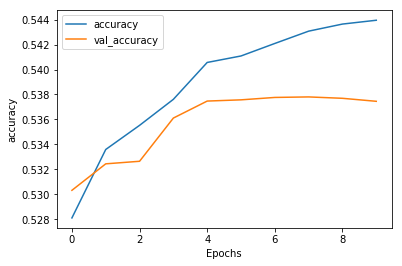

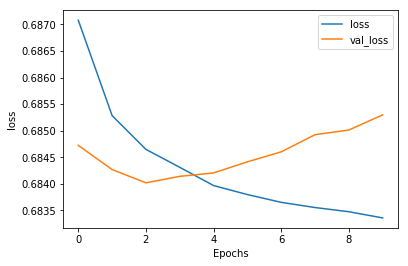

In [17]:
#The accuracy was barely about 50 percent. While losses decreasing, it's decreasing in a very small way. 
#The keys in the fact that we're using sub-words and not for-words?, sub-word meanings are often nonsensical 
#and it's only when we put them together in sequences that they have meaningful semantics. Thus, some way 
#from learning from sequences would be a great way forward.

import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+ string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")